# SVM Classification and Confusion Matrix Analysis

This code snippet demonstrates SVM classification on the 'A2-ring-separable.txt' dataset, including data preprocessing, training, prediction, and the calculation of classification error. Additionally, a confusion matrix is plotted to provide further insight into the model's performance.

## Libraries Used

- **matplotlib.pyplot (plt):** For plotting figures and visualizations.
- **seaborn (sn):** For creating heatmaps.
- **sklearn.metrics.confusion_matrix:** For generating a confusion matrix.
- **pandas (pd):** For data manipulation and reading CSV data.
- **numpy (np):** For numerical operations on the data.
- **sklearn.datasets:** For loading datasets.
- **sklearn.model_selection:** For splitting the data into training and test sets and performing grid search for hyperparameter tuning.
- **sklearn.svm.SVC:** Support Vector Machine classifier.
- **sklearn.metrics.accuracy_score:** For evaluating the accuracy of the classifier.


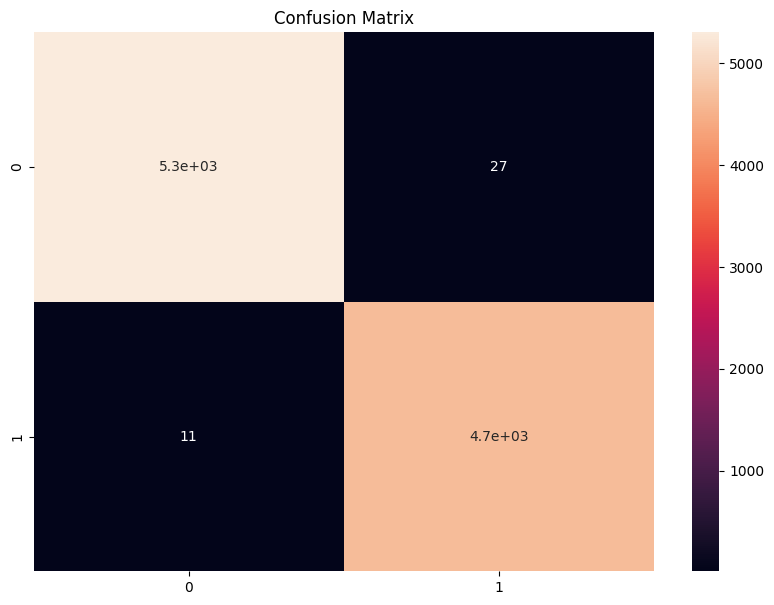

Classification error:  0.38


In [2]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def calculate_classification_error(y_true, y_pred):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True)
    # name of the plot
    plt.title('Confusion Matrix')
    # show plot
    plt.show()
    
    # Extracting elements from the confusion matrix
    n00, n01, n10, n11 = cm.ravel()
    
    # Classification error calculation
    classification_error = 100 * (n01 + n10) / (n00 + n11 + n01 + n10)
    
    return classification_error

df_separable = pd.read_csv('A2-ring-separable.txt', sep='\t', header=None)
df_separable.columns = ['x1', 'x2', 'y']

X_train, y_train = df_separable.drop(["y"], axis=1), df_separable[["y"]]

df_test = pd.read_csv('A2-ring-test.txt', sep='\t', header=None)
df_test.columns = ['x1', 'x2', 'y']

X_test, y_test = df_test.drop(["y"], axis=1), df_test[["y"]]

# ravel y_train and y_test
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
# Train a SVM classifier with cross-validation
svm = SVC(C=100, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)

# Predict the test set
y_pred = svm.predict(X_test)

# Calculate the classification error
classification_error = calculate_classification_error(y_test, y_pred)

print("Classification error: ", classification_error)

# Visualization of SVM Classification Results

This code snippet provides visualizations of SVM classification results using scatter plots. The plots include the original test set, the predicted test set, and the differences between the actual and predicted classes.

## Libraries Used

- **matplotlib.pyplot (plt):** For plotting figures and visualizations.


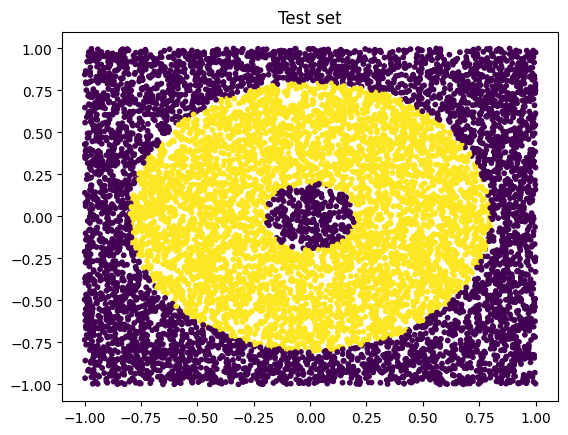

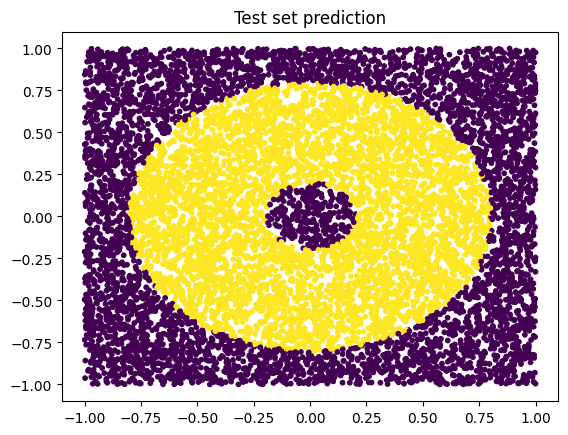

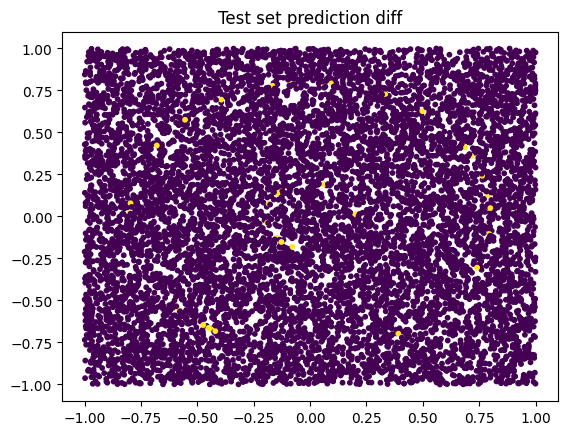

In [8]:
plt.scatter(X_test["x1"], X_test["x2"], c=y_test, s=10)
plt.title("Test set")
plt.show()

plt.scatter(X_test["x1"], X_test["x2"], c=y_pred, s=10)
plt.title("Test set prediction")
plt.show()

# make a plot with the different points between the two classes in the ytest and ypred
plt.scatter(X_test["x1"], X_test["x2"], c=y_test ^ y_pred, s=10)
plt.title("Test set prediction diff")
plt.show()
